# Treating Skin Disease Identification as a simple 3 classes classification Task
## Choose classes.
We have choosen 3 classes with equal amount of images = 151 hence there is no class imbalance.

## Results

### Without Image augmentation
The model heavily overfitted, possible reasons are not enough data as it was working fine on binary classifcation with val-accuracy remaining under 50%

### With Image Augmentation.
The model improved substantially with val-accuracy reaching 70% with few parameter changes But still not enougb with an accuracy of 95%

### After Hyperparamter optimization and adjusting epochs 
The model improved slightly with the accuracy reaching 98% with validation accuracy reaching 77%, still model being quite overfitted.

## Further Steps
- Try this on binary segmented data images using a pre-trained model of segment anything
- Try this with Otus's segmentation
- Improve the architecture of the model this is a very prelimnary architecture.



In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

dataset_path = ""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        dataset_path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [45]:
files_list = glob.glob("/kaggle/input/fitzpatrick/*")
files_list

['/kaggle/input/fitzpatrick/fitzPatrickCategorizer.py',
 '/kaggle/input/fitzpatrick/fitzpatrick_cleaned_annoted_data.xlsx',
 '/kaggle/input/fitzpatrick/fitzPatrickDownloader.py',
 '/kaggle/input/fitzpatrick/CategorizedFitz',
 '/kaggle/input/fitzpatrick/image.csv',
 '/kaggle/input/fitzpatrick/fitzpatrick17k.csv']

In [46]:
images = glob.glob('/kaggle/input/fitzpatrick/*/')[0]
images

'/kaggle/input/fitzpatrick/CategorizedFitz/'

In [47]:
label_151 = ['pediculosis lids', 'dermatomyositis', 'acne']


In [48]:


# Sort the list in alphanumerical order
sorted_labels = sorted(label_151)

sorted_labels

['acne', 'dermatomyositis', 'pediculosis lids']

In [49]:
#Entirely used to make_directory of working classes
working_path = "/kaggle/working/working_classes_7"
import shutil
if not(os.path.exists(working_path)):
    os.mkdir(working_path)
for label in label_151:
    new_dir = working_path + "/" + label
    shutil.copytree(images + "/" + label, new_dir)
    
workings = glob.glob(working_path + "/*/")

FileExistsError: [Errno 17] File exists: '/kaggle/working/working_classes_7/pediculosis lids'

In [50]:
workings

NameError: name 'workings' is not defined

In [51]:
sorted_labels

['acne', 'dermatomyositis', 'pediculosis lids']

In [52]:
workings = glob.glob(working_path + "/" + sorted_labels[2] + "/*")
len(workings)

151

In [53]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

['/kaggle/input/fitzpatrick/CategorizedFitz/acne/dc9fc1c8428e390e6f790e19d24c4e4a.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/8c0eeb53db59a24675cb21b640006fd8.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/0bd2ab66f36e69352a45d5122f4aad07.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/1908406a9d82168af4c6596cf963dbcc.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/728a36e89f7599c7740a0935c8e36621.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/c01fbc5996baf26b3ba5db9c785c9436.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/d2d7fe50c09a826652c64f601a00dc9e.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/92263f85d6f3398535bdf5535d78a827.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/6372c52836107dd23cff2f8c972353ef.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/dc5783ebf370ccb672625f16d07e1512.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/b50beca100950b19f754ba74b5d8dc80.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz

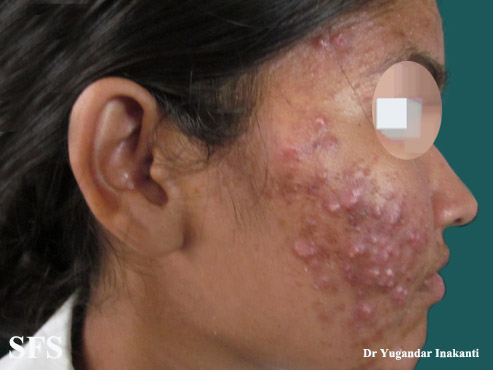

In [54]:
urticaria = glob.glob(images + label_151[2] + "/*")
print(urticaria)
PIL.Image.open(urticaria[1])

In [55]:
batch_size = 32
img_height = 256
img_width = 256

In [56]:
working_path

'/kaggle/working/working_classes_7'

In [57]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  working_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 485 files belonging to 3 classes.
Using 388 files for training.


In [58]:
print(train_ds.class_names)

['acne', 'dermatomyositis', 'pediculosis lids']


In [59]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  working_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 485 files belonging to 3 classes.
Using 97 files for validation.


In [10]:
class_names = val_ds.class_names
print(class_names)

NameError: name 'val_ds' is not defined

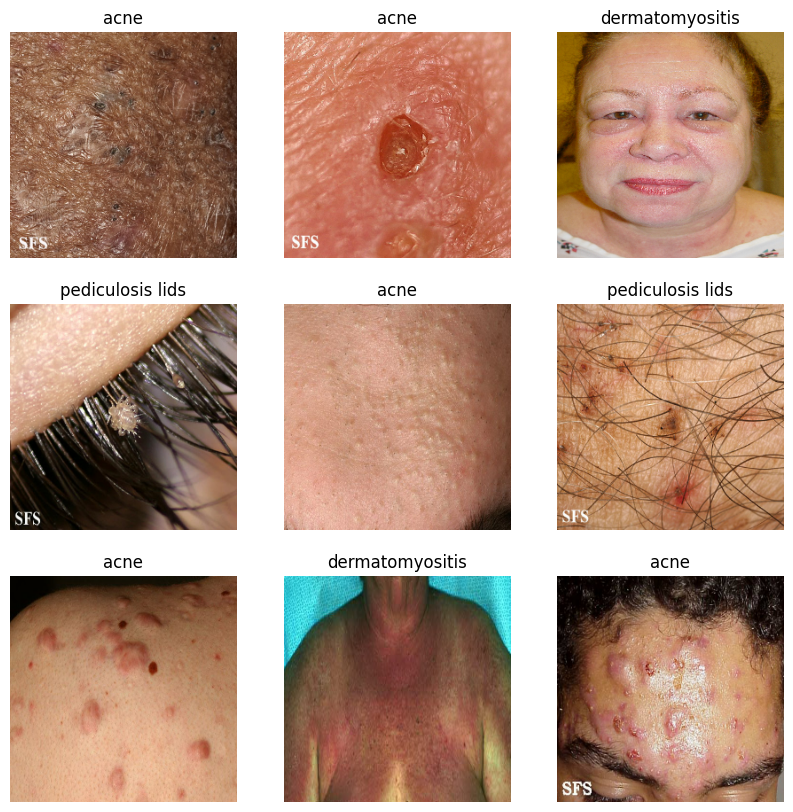

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
def preprocess_image(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    # Convert image to tf.float32
    resized_image = tf.cast(resized_image, tf.float32)
    # Normalize the image to the range [0, 1]
    normalized_image = resized_image / 255.0
    
    return resized_image, label

train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)


In [149]:
#The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [150]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [151]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.1281633 0.9735595


In [152]:
#Just for performance, so dataset doesn't become bottleneck, mostly not needed here
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [153]:
data_augmentation_horizontal = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),

  ]
)

data_augmentation_vertical = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("vertical", input_shape= (img_height, img_width, 3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

In [171]:
num_classes = 3

model = tf.keras.Sequential([
  data_augmentation_horizontal,
    data_augmentation_vertical,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    
  tf.keras.layers.Dense(num_classes,activation="softmax", kernel_regularizer= "l2")
])

In [172]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 batch_normalization_25 (Ba  (None, 254, 254, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                

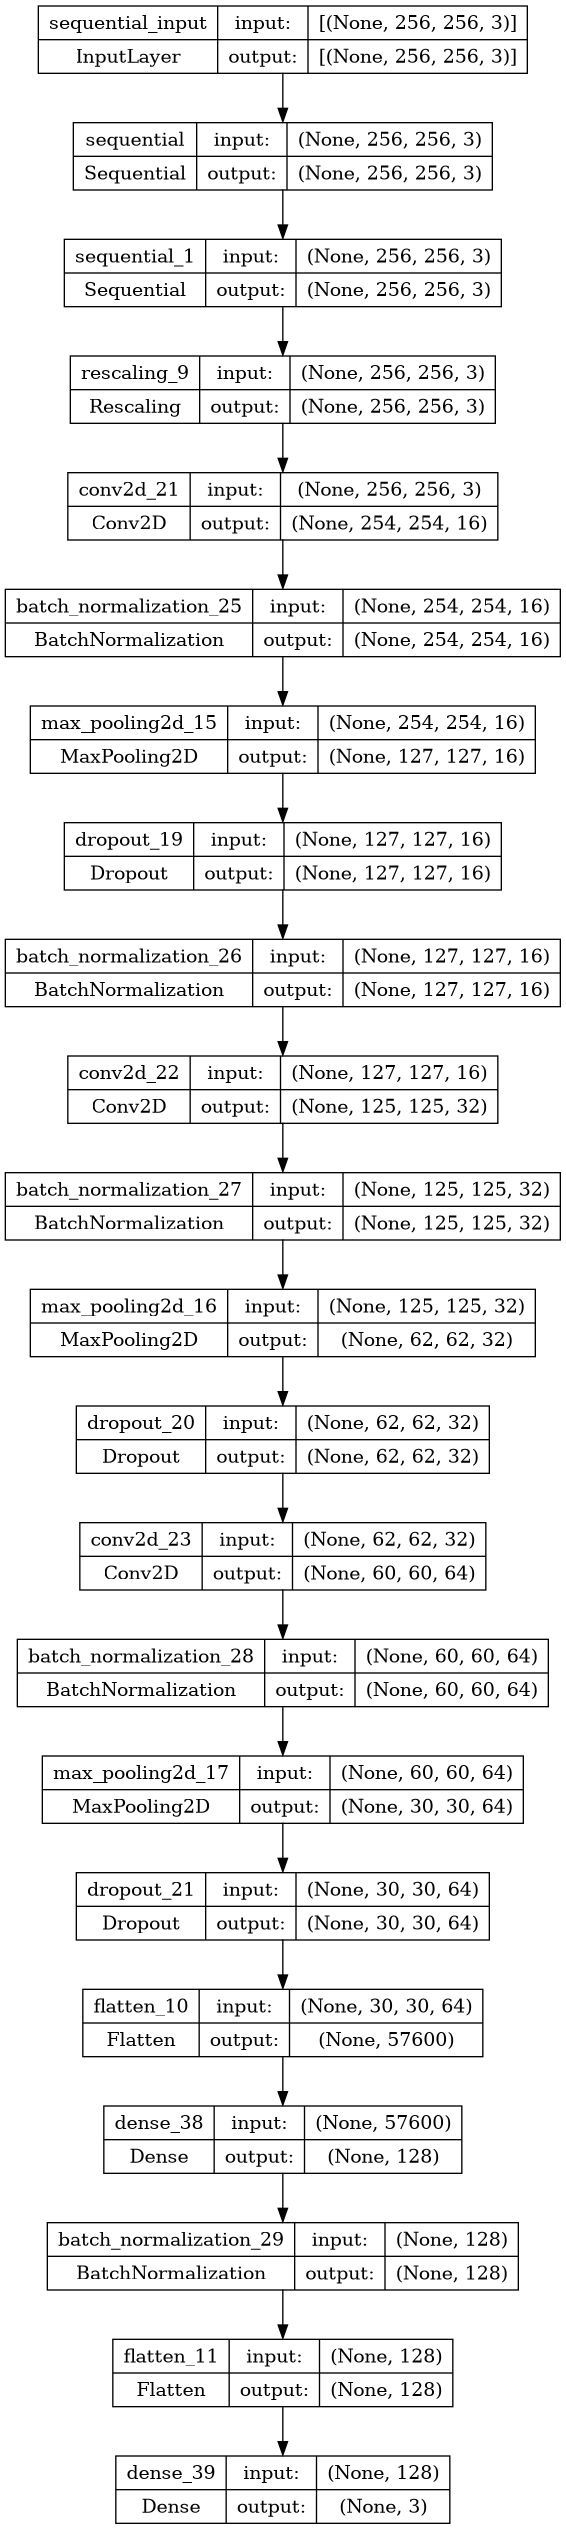

In [173]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [161]:
# Implement callbacks like EarlyStopping and potentially LearningRateScheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

In [174]:
history  = model.fit(
  train_ds,
  validation_data=val_ds,
  
  epochs=60,
     
)

Epoch 1/60


2024-04-11 23:50:19.272301: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_19/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


13/13 [==============================] - 6s 96ms/step - loss: 1.5388 - accuracy: 0.5722 - val_loss: 3.4740 - val_accuracy: 0.3608
Epoch 2/60
13/13 [==============================] - 2s 84ms/step - loss: 0.8793 - accuracy: 0.6727 - val_loss: 3.4109 - val_accuracy: 0.3711
Epoch 3/60
13/13 [==============================] - 2s 84ms/step - loss: 0.7380 - accuracy: 0.7345 - val_loss: 2.6116 - val_accuracy: 0.3402
Epoch 4/60
13/13 [==============================] - 2s 82ms/step - loss: 0.6345 - accuracy: 0.7397 - val_loss: 3.1104 - val_accuracy: 0.3608
Epoch 5/60
13/13 [==============================] - 2s 84ms/step - loss: 0.6357 - accuracy: 0.7345 - val_loss: 3.2418 - val_accuracy: 0.3608
Epoch 6/60
13/13 [==============================] - 2s 81ms/step - loss: 0.7159 - accuracy: 0.7191 - val_loss: 2.8529 - val_accuracy: 0.3608
Epoch 7/60
13/13 [==============================] - 2s 88ms/step - loss: 0.6550 - accuracy: 0.7448 - val_loss: 3.4467 - val_accuracy: 0.3608
Epoch 8/60
13/13 [======

In [ ]:
z

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
os.mkdir("/kaggle/working/experiment_01_image_augmentation_tf_image_classification")


In [ ]:
plt.savefig("/kaggle/working/experiment_01_image_augmentation_tf_image_classification/metrics_chart.png")

In [64]:
def preprocess_image(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    # Convert image to tf.float32
    resized_image = tf.cast(resized_image, tf.float32)
    # Normalize the image to the range [0, 1]
    normalized_image = resized_image / 255.0
    
    return resized_image, label

train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)


In [ ]:
import tensorflow as tf
from transformers import ViTFeatureExtractor, TFAutoModelForImageClassification

num_classes = 3
image_size = 224  # Standard image size for Vision Transformer

# Initialize the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

# Load the Vision Transformer model pre-trained on ImageNet-21k
# We will fine-tune this model on your specific dataset
model = TFAutoModelForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=num_classes,  # Number of output classes
    id2label={str(i): f'label_{i}' for i in range(num_classes)},  # Optional: Mapping for id to label
    label2id={f'label_{i}': str(i) for i in range(num_classes)},  # Optional: Mapping for label to id
)

# Compile the model with optimizer, loss, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Model summary to see the full architecture
model.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
  EarlyStopping(monitor='val_loss', patience=10),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)  # Save the best model based on `val_loss`
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=60,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
for images, labels in train_ds.take(1):
    print(images.shape)  # Expecting something like (batch_size, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def create_vit_classifier(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim):
    inputs = layers.Input(shape=input_shape)
    # Create patches
    patches = Patches(patch_size)(inputs)
    
    # Encode patches to a latent space
    encoded_patches = PatchEncoder(num_patches, embedding_dim)(patches)
    
    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x4 = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x3)
        x5 = layers.Dense(embedding_dim)(x4)
        encoded_patches = layers.Add()([x5, x2])
    
    # Create a [batch_size, embedding_dim] tensor
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Classify outputs
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    
    # Create the Keras model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# Model configuration
input_shape = (224, 224, 3)  # Input image size
num_classes = 5  # Example number of classes
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)
num_transformer_blocks = 4  # Number of transformer blocks
embedding_dim = 64  # Dimensionality of the patch encoding and transformer internal embedding
num_heads = 4  # Number of attention heads
mlp_dim = 128  # Dimensionality of the dense layers of the transformer

# Create the ViT model
vit_model = create_vit_classifier(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim)

# Compile the model
vit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
vit_model.summary()


In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(vit_model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
  EarlyStopping(monitor='val_loss', patience=50),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model_vit.h5', monitor='val_loss', save_best_only=True)  # Save the best model based on `val_loss`
]

history = vit_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from transformers import TFAutoModel


In [ ]:
def create_cnn_model(fine_tune_at=100):
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    model = tf.keras.Model(inputs, x)
    return model


In [ ]:
class CombinedCNNModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(CombinedCNNModel, self).__init__()
        self.cnn = create_cnn_model()
        self.dense1 = tf.keras.layers.Dense(1024, activation='relu')  # Example of an additional dense layer
        self.dropout = tf.keras.layers.Dropout(0.5)  # Dropout layer to reduce overfitting
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.cnn(inputs)
        x = self.dense1(x)
        x = self.dropout(x)
        return self.classifier(x)


In [ ]:
num_classes = 5  # For example, using CIFAR-10 dataset
model = CombinedCNNModel(num_classes=num_classes)

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.build((None, 224, 224, 3))  # None allows for a variable batch size
model.summary()


In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [ ]:
history  = model.fit(
  train_ds,
  validation_data=val_ds,
  
  epochs=100,
     
)

In [22]:
#LATEST
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
import cv2
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom

class ResizeLayer(tf.keras.layers.Layer):
    def __init__(self, size=(224, 224), **kwargs):
        super(ResizeLayer, self).__init__(**kwargs)
        self.size = size

    def call(self, inputs):
        # Resize the inputs to the specified size
        return tf.image.resize(inputs, self.size)
    
class OtsuThresholdingLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(OtsuThresholdingLayer, self).__init__()

    def call(self, inputs):
        # Wrap the Otsu's thresholding function with tf.py_function
        output = tf.py_function(self.apply_otsu_thresholding, [inputs], tf.float32)
        
        # Manually set the shape of the output to match the input shape
        # This is necessary because tf.py_function does not automatically infer output shapes
        output.set_shape(inputs.shape)  # Assuming the output shape is the same as the input shape
        
        return output

    def apply_otsu_thresholding(self, inputs):
        # This function is applied to each item in the batch
        def threshold(image):
            # Convert image to grayscale
            image = image.numpy()
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            # Apply Otsu's thresholding
            _, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            # Expand dimensions of mask to match input image, and apply mask
            binary_mask_3ch = np.stack([binary_mask]*3, axis=-1)
            return image * (binary_mask_3ch / 255.0)
        
        # Apply the threshold function to each image in the batch
        batch_images = np.array([threshold(inputs[i]) for i in range(inputs.shape[0])])
        
        return batch_images

    
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = self.position_embedding(tf.range(start=0, limit=self.num_patches, delta=1))
        encoded = self.projection(patch) + positions
        return encoded

def create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim, regularization_factor=0.01, dropout_rate=0.1):
    inputs = layers.Input(shape=input_shape)
    
    # Convolutional preprocessing
    inputs = tf.keras.Input(shape=(None, None, 3))  # Assuming the input shape is dynamic
    resize_layer = ResizeLayer(size=(224, 224))
    resized_inputs = resize_layer(inputs)
    x = Rescaling(scale=1./255)(resized_inputs)  # Normalize pixel values to [0, 1]
    x = RandomFlip("horizontal_and_vertical")(x)  # Data Augmentation: Random Flips
    x = RandomRotation(0.2)(x)  # Data Augmentation: Random Rotations
    x = RandomZoom(height_factor=0.2, width_factor=0.2)(x)  # Data Augmentation: Random Zoom
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="relu", 
                      kernel_regularizer=l2(regularization_factor))(x)
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="relu", 
                      kernel_regularizer=l2(regularization_factor))(x)
    
    # Create patches
    patches = Patches(patch_size)(x)
    num_patches = (input_shape[0] // 4 // patch_size) ** 2
    encoded_patches = PatchEncoder(num_patches, embedding_dim)(patches)
    
    # Transformer blocks with dropout
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=dropout_rate)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x2 = layers.Dropout(dropout_rate)(x2)  # Applying dropout after the first add operation
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x4 = layers.Dense(mlp_dim, activation=tf.nn.gelu, 
                          kernel_regularizer=l2(regularization_factor))(x3)
        x4 = layers.Dropout(dropout_rate)(x4)
        x5 = layers.Dense(embedding_dim, kernel_regularizer=l2(regularization_factor))(x4)
        encoded_patches = layers.Add()([x5, x2])
    
    # Final layers
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)  # Increased dropout in the final representation
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


# Model configuration
input_shape = (224, 224, 3)
num_classes = 3
patch_size = 16
num_transformer_blocks = 4
embedding_dim = 64
num_heads = 4
mlp_dim = 128

# Now using Adam optimizer with a learning rate scheduler or a chosen learning rate
vit_model_with_cnn = create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim)
vit_model_with_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
                           loss='sparse_categorical_crossentropy', metrics=['accuracy'])

vit_model_with_cnn.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 resize_layer (ResizeLayer)  (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['resize_layer[0][0]']        
                                                                                                  
 random_flip (RandomFlip)    (None, 224, 224, 3)          0         ['rescaling[0][0]']           
                                                                                              

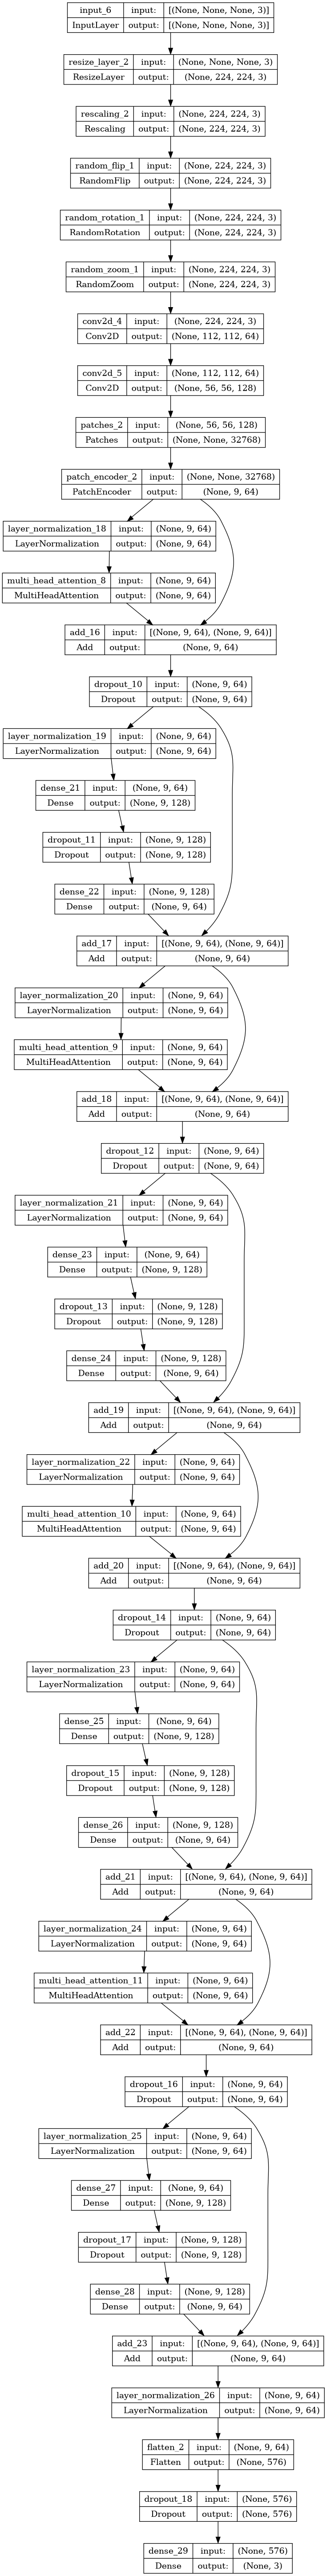

In [143]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(vit_model_with_cnn, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [144]:
vit_model_with_cnn.save("/kaggle/working/model.keras")

In [145]:
%load_ext tensorboard


In [ ]:
log_dir = './logs'


In [ ]:
# tensorboard_callback = tf.keras.callbacks.


In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

callbacks = [
  EarlyStopping(monitor='val_loss', patience=100),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True),  # Save the best model based on `val_loss`
#     TensorBoard(log_dir=log_dir, histogram_freq=1),

]

history = vit_model_with_cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=150,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


Epoch 1/150
13/13 [==============================] - ETA: 0s - loss: 9.5330 - accuracy: 0.2964

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 23s 184ms/step - loss: 9.5330 - accuracy: 0.2964 - val_loss: 8.9872 - val_accuracy: 0.3608
Epoch 2/150
13/13 [==============================] - 2s 111ms/step - loss: 9.4290 - accuracy: 0.3299 - val_loss: 8.6844 - val_accuracy: 0.3918
Epoch 3/150
13/13 [==============================] - 2s 106ms/step - loss: 9.2837 - accuracy: 0.3247 - val_loss: 8.6282 - val_accuracy: 0.4330
Epoch 4/150
13/13 [==============================] - 2s 109ms/step - loss: 9.0729 - accuracy: 0.4124 - val_loss: 8.5674 - val_accuracy: 0.3814
Epoch 5/150
13/13 [==============================] - 2s 104ms/step - loss: 8.9892 - accuracy: 0.3866 - val_loss: 8.4962 - val_accuracy: 0.4433
Epoch 6/150
13/13 [==============================] - 2s 117ms/step - loss: 8.9451 - accuracy: 0.3892 - val_loss: 8.3181 - val_accuracy: 0.5979
Epoch 7/150
13/13 [==============================] - 2s 108ms/step - loss: 8.8351 - accuracy: 0.3582 - val_loss: 8.2103 - val_accuracy: 0.5464
Epoch 8/15

In [29]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Use the custom_object_scope to load the model
with tf.keras.utils.custom_object_scope({'Patches': Patches, 'PatchEncoder': PatchEncoder}):
    model = tf.keras.models.load_model("/kaggle/working/best_model.h5")

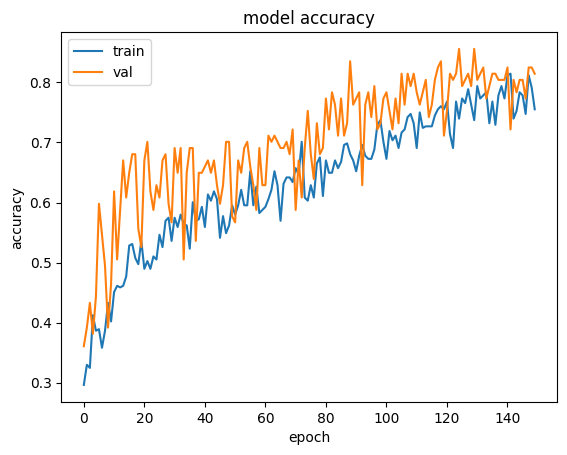

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
bimport json

# # Convert the history.history dict to a JSON file
# with open('/kaggle/working/best_model.json', 'w') as f:
#     json.dump(history.history, f)
with open('/kaggle/working/best_model.json', 'r') as f:
    loaded_history = json.load(f)


plt.plot(loaded_history['accuracy'])
plt.plot(loaded_history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from IPython.display import FileLink
FileLink(r'best_model.h5')

In [ ]:
def preprocess_image_file(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0, 1]
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    return image


In [23]:
def predict_and_filter(image_path, threshold=0.85):
    # Preprocess the image
    processed_image = preprocess_image_file(image_path)
    
    # Make prediction
    prediction = vit_model_with_cnn.predict(processed_image)
    
    # Find the highest probability and its corresponding class
    max_prob = np.max(prediction)
    predicted_class = np.argmax(prediction)
    
    # Apply the threshold
    if max_prob > threshold:
        print(f"Image: {image_path}")
        print(f"Predicted Class: {predicted_class}, Probability: {max_prob}")
    else:
        print("No prediction exceeds the threshold.")


In [24]:
def predict_and_return_all_probabilities(image_path, sorted_labels, threshold=0.85):
    # Preprocess the image
    processed_image = preprocess_image_file(image_path)
    
    # Make prediction
    prediction = vit_model_with_cnn.predict(processed_image)
    
    # Squeeze to remove batch dimension since we're predicting one image at a time
    prediction = np.squeeze(prediction)
    
    # Find the highest probability and its corresponding class
    max_prob = np.max(prediction)
    predicted_class = np.argmax(prediction)
    predicted_class_name = sorted_labels[predicted_class]
    
    # Print all probabilities along with class names
    print("Probabilities for all classes:")
    for label, prob in zip(sorted_labels, prediction):
        print(f"{label}: {prob*100:.2f}%")
    
    # Apply the threshold to the highest probability
    if max_prob > threshold:
        print(f"\nImage: {image_path}")
        print(f"Predicted Class: {predicted_class_name}, Probability: {max_prob*100:.2f}%")
    else:
        print("\nNo prediction exceeds the threshold.")



In [25]:
#Lids
image_path = "/kaggle/working/working_classes_7/dermatomyositis/b52efd7c589b38ca46aa4adb9ba498e0.jpg"
predict_and_return_all_probabilities(image_path, sorted_labels)


NameError: name 'preprocess_image_file' is not defined

In [138]:
#dermatoyomosis
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

#Dermyotois
# Replace 'path_to_your_image.jpg' with the actual file path
image_path = '/kaggle/input/fitzpatrick/CategorizedFitz/melanoma/06aa37c1fb2ae9dadf126143b98a1640.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image
image = img_to_array(image)  # Convert the image to an array
image = np.expand_dims(image, axis=0)  # Add a batch dimension
image = preprocess_input(image)  # Preprocess the image as required by your model

In [139]:
# Assuming `model` is your loaded model
predictions = vit_model_with_cnn.predict(image)


1/1 [==============================] - 0s 25ms/step


In [140]:
predictions

array([[4.1113081e-03, 6.4880052e-04, 9.9523985e-01]], dtype=float32)

In [141]:
glob.glob("/kaggle/working/working_classes/*")

['/kaggle/working/working_classes/dermatomyositis',
 '/kaggle/working/working_classes/pediculosis lids',
 '/kaggle/working/working_classes/urticaria']

In [127]:

# Sort the list in alphanumerical order
sorted_labels = sorted(label_151)

sorted_labels

['acne', 'dermatomyositis', 'pediculosis lids']

In [128]:
# Assuming you have a list of class names corresponding to the model's outputs
class_names = sorted_labels  # Update this with your actual class names

# Print probabilities with corresponding class names
for class_name, prediction in zip(class_names, predictions[0]):
    print(f"{class_name}: {prediction*100:.2f}%")


acne: 0.12%
dermatomyositis: 0.00%
pediculosis lids: 99.88%


In [37]:
# Get the index of the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class_name}, Probability: {predicted_probability*100:.2f}%")


Predicted class: dermatomyositis, Probability: 89.63%


In [107]:
#dermatoyomosis
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

#Acne
# Replace 'path_to_your_image.jpg' with the actual file path
image_path = '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/0e792dd9f58c7e674eb972176feb0202.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image
image = img_to_array(image)  # Convert the image to an array
image = np.expand_dims(image, axis=0)  # Add a batch dimension
image = preprocess_input(image)  # Preprocess the image as required by your model

In [108]:
# Assuming `model` is your loaded model
predictions = vit_model_with_cnn.predict(image)


1/1 [==============================] - 0s 23ms/step


In [109]:
# Assuming you have a list of class names corresponding to the model's outputs
class_names = sorted_labels  # Update this with your actual class names
print(class_names)
# Print probabilities with corresponding class names
for class_name, prediction in zip(class_names, predictions[0]):
    print(f"{class_name}: {prediction*100:.2f}%")


['acne', 'dermatomyositis', 'pediculosis lids']
acne: 0.19%
dermatomyositis: 0.00%
pediculosis lids: 99.81%


In [100]:
# Get the index of the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class_name}, Probability: {predicted_probability*100:.2f}%")


Predicted class: pediculosis lids, Probability: 99.70%


In [42]:
glob.glob("/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/*")

['/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/66c29e61739db4535bf5e8f472ea346a.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/9f2521a07b5f8acca19872f2b5e7d842.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/ee1ac3800fde220846555bf3c6dfbc47.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/10134f12af27189d52398d32278d5848.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/fc1780e365feca275ecee17614814ab8.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/bd70fbb7442412ce54b1420b61bbfc07.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/31db72d42e3f8d037635d20c1b9ffdd3.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/7d28bd55747a91f1766a0a708e97599a.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/c76e443d3f69d02f25983903b64dfc83.jpg',
 '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/5aa5b93b939e9bad217b6dfbd1e76dd0.jpg',


In [43]:
sorted_labels

['acne', 'dermatomyositis', 'pediculosis lids']

In [80]:
#dermatoyomosis
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

#Preducolosis
# Replace 'path_to_your_image.jpg' with the actual file path
image_path = '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/8870251f572212973b43392b34ae9eb8.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image
image = img_to_array(image)  # Convert the image to an array
image = np.expand_dims(image, axis=0)  # Add a batch dimension
image = preprocess_input(image)  # Preprocess the image as required by your model

In [81]:
# Assuming `model` is your loaded model
predictions = vit_model_with_cnn.predict(image)


1/1 [==============================] - 0s 23ms/step


In [82]:
# Assuming you have a list of class names corresponding to the model's outputs
class_names = sorted_labels  # Update this with your actual class names

# Print probabilities with corresponding class names
for class_name, prediction in zip(class_names, predictions[0]):
    print(f"{class_name}: {prediction*100:.2f}%")


acne: 0.77%
dermatomyositis: 0.10%
pediculosis lids: 99.13%


In [ ]:
%load_ext tensorboard
# train and collect logs then call tensorboard
%tensorboard --logdir logs/fit --port 6000

In [ ]:
# Serialize the model architecture to JSON
model_json = vit_model_with_cnn.to_json()

# Write the model JSON to a file
with open("/kaggle/working/vit_model_with_cnn_architecture.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
# Save the entire model to a file (includes architecture, weights, and optimizer state)
vit_model_with_cnn.save("/kaggle/working/vit_model_with_cnn_3.h5")


In [ ]:
%tensorboard --logdir /kaggle/working/logs/fit/20240330-161342 --port 6000


In [ ]:
%tensorboard --logdir /kaggle/working/logs/fit/20240330-161342

In [ ]:
tensorboard --logdir logs/fit --port 8080


In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

# Set up the log directory
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Create TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = vit_model_with_cnn.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[tensorboard_callback]
)

# Start TensorBoard within the notebook using the same log directory
%tensorboard --logdir logs/fit


DEBUGGING 


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming the Patches class is defined as in your code snippet
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Create a dummy image tensor (e.g., a single 224x224 RGB image)
dummy_image = tf.random.normal([1, 224, 224, 3])

# Initialize the Patches layer with your desired patch size
patch_size = 16  # Example patch size
patches_layer = Patches(patch_size=patch_size)

# Call the layer with the dummy image
patches = patches_layer(dummy_image)

print("Shape of patches:", patches.shape)


In [ ]:
# Assuming the PatchEncoder class is defined as in your code snippet
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):

        batch_size = tf.shape(patch)[0]
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        positions = self.position_embedding(positions)  # [num_patches, projection_dim]

        # Debugging: Print shapes
        print("Before expansion, positions shape:", positions.shape)

        # Expand dims to [1, num_patches, projection_dim] and tile to match batch size
        positions = tf.expand_dims(positions, axis=0)  # Add batch dimension
        positions = tf.tile(positions, [batch_size, 1, 1])  # Tile to match `patch`'s batch size

        # Debugging: Print shapes before the addition
        print("Positions shape:", positions.shape)
        print("Patch projection shape:", self.projection(patch).shape)

        encoded = self.projection(patch) + positions
        return encoded



# Assume `patches` is obtained from the previous step
# Calculate the number of patches based on the image and patch sizes
num_patches = ((224 // 4) // patch_size) * ((224 // 4) // patch_size)
projection_dim = 64  # Example projection dimension

# Initialize the PatchEncoder layer
patch_encoder_layer = PatchEncoder(num_patches=num_patches, projection_dim=projection_dim)

# Call the layer with the patches
encoded_patches = patch_encoder_layer(patches)

print("Shape of encoded patches:", encoded_patches.shape)


In [ ]:
%pip install visualkeras

In [ ]:
import visualkeras

In [ ]:
visualkeras.layered_view(vit_model_with_cnn, to_file='/kaggle/working/model.png', type_ignore=[visualkeras.SpacingDummyLayer])

In [ ]:
# Load the extension and start TensorBoard

%load_ext tensorboard
%tensorboard --logdir logs

In [69]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

class ResizeLayer(tf.keras.layers.Layer):
    def __init__(self, size=(224, 224), **kwargs):
        super(ResizeLayer, self).__init__(**kwargs)
        self.size = size

    def call(self, inputs):
        # Resize the inputs to the specified size
        return tf.image.resize(inputs, self.size)
    
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, regularization_factor=0.01):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim, 
                                       kernel_regularizer=l2(regularization_factor))
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        batch_size = tf.shape(patch)[0]
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        positions = self.position_embedding(positions)

        # Expand dims to [1, num_patches, projection_dim] and tile to match batch size
        positions = tf.expand_dims(positions, axis=0)
        positions = tf.tile(positions, [batch_size, 1, 1])

        encoded = self.projection(patch) + positions
        return encoded

def create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim):
    inputs = layers.Input(shape=input_shape)
    
    # Convolutional preprocessing
    # Convolutional preprocessing
    inputs = tf.keras.Input(shape=(None, None, 3))  # Assuming the input shape is dynamic
    resize_layer = ResizeLayer(size=(224, 224))
    resized_inputs = resize_layer(inputs)
    x = Rescaling(scale=1./255)(resized_inputs)  # Normalize pixel values to [0, 1]
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="relu", 
                  kernel_regularizer=l2(0.01))(x)
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="relu", 
                      kernel_regularizer=l2(0.01))(x)



    # Create patches from the output of the CNN
    patches = Patches(patch_size)(x)
    
    # Adjust the number of patches based on the new size after convolutional layers
    size_after_conv = input_shape[0] // 4  # Adjust based on your convolutional layers
    num_patches = (size_after_conv // patch_size) * (size_after_conv // patch_size)
    encoded_patches = PatchEncoder(num_patches, embedding_dim)(patches)
    
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x4 = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x3)
        x5 = layers.Dense(embedding_dim)(x4)
        encoded_patches = layers.Add()([x5, x2])
    
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

# Model configuration
input_shape = (224, 224, 3)
num_classes = 3
patch_size = 16
num_transformer_blocks = 4
embedding_dim = 64
num_heads = 4
mlp_dim = 128

# Create the ViT model with convolutional layers
vit_model_with_cnn = create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim)

# Compile the model
vit_model_with_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
vit_model_with_cnn.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 resize_layer_1 (ResizeLaye  (None, 224, 224, 3)          0         ['input_4[0][0]']             
 r)                                                                                               
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['resize_layer_1[0][0]']      
                                                                                                  
 conv2d_2 (Conv2D)           (None, 112, 112, 64)         1792      ['rescaling_1[0][0]']   

In [70]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

callbacks = [
  EarlyStopping(monitor='val_loss', patience=100),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True),  # Save the best model based on `val_loss`
#     TensorBoard(log_dir=log_dir, histogram_freq=1),

]

history = vit_model_with_cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=150,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


Epoch 1/150
13/13 [==============================] - 16s 145ms/step - loss: 3.4070 - accuracy: 0.3789 - val_loss: 2.6021 - val_accuracy: 0.4536
Epoch 2/150
13/13 [==============================] - 2s 91ms/step - loss: 2.9232 - accuracy: 0.3943 - val_loss: 2.4889 - val_accuracy: 0.3918
Epoch 3/150
13/13 [==============================] - 2s 91ms/step - loss: 2.6599 - accuracy: 0.3814 - val_loss: 2.2276 - val_accuracy: 0.4433
Epoch 4/150
13/13 [==============================] - 2s 102ms/step - loss: 2.4758 - accuracy: 0.3943 - val_loss: 1.9187 - val_accuracy: 0.4845
Epoch 5/150
13/13 [==============================] - 2s 92ms/step - loss: 2.1851 - accuracy: 0.3892 - val_loss: 1.7810 - val_accuracy: 0.5567
Epoch 6/150
13/13 [==============================] - 2s 92ms/step - loss: 2.0964 - accuracy: 0.4485 - val_loss: 1.7119 - val_accuracy: 0.5155
Epoch 7/150
13/13 [==============================] - 1s 73ms/step - loss: 1.8580 - accuracy: 0.4845 - val_loss: 1.9484 - val_accuracy: 0.4021
Epo

In [31]:
from tensorflow.keras.applications import ConvNeXtXLarge
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.convnext import preprocess_input, decode_predictions
import numpy as np


In [33]:
model = ConvNeXtXLarge(
    model_name="convnext_xlarge",
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


1401457568/1401457568 [==============================] - 8s 0us/step


In [34]:
img_path = '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/6c1765b5e7160d13fb5b4604c9a67e93.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # Adjust size if necessary
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


In [35]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n01776313', 'tick', 0.9841285), ('n02165456', 'ladybug', 0.0004646883), ('n01773549', 'barn_spider', 0.00045224297)]


In [60]:
import tensorflow as tf

# Assume 'num_classes' is the number of unique classes in your dataset
num_classes = 3

def preprocess_image(image, label):
    label = tf.one_hot(label, depth=num_classes)
    return image, label

# Apply the preprocessing function to your datasets
train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)


In [65]:
from tensorflow.keras.applications import ConvNeXtXLarge
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained ConvNeXtXLarge model without the top layer
base_model = ConvNeXtXLarge(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers for your classification task
x = base_model.output
predictions = Dense(3, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [67]:
model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
13/13 [==============================] - 47s 2s/step - loss: 0.7268 - accuracy: 0.6778 - val_loss: 0.3464 - val_accuracy: 0.8660
Epoch 2/10
13/13 [==============================] - 14s 1s/step - loss: 0.2665 - accuracy: 0.8866 - val_loss: 0.2945 - val_accuracy: 0.9072
Epoch 3/10
13/13 [==============================] - 14s 1s/step - loss: 0.1580 - accuracy: 0.9407 - val_loss: 0.3215 - val_accuracy: 0.8866
Epoch 4/10
13/13 [==============================] - 14s 1s/step - loss: 0.1147 - accuracy: 0.9562 - val_loss: 0.2450 - val_accuracy: 0.9381
Epoch 5/10
13/13 [==============================] - 14s 1s/step - loss: 0.0857 - accuracy: 0.9794 - val_loss: 0.2550 - val_accuracy: 0.8969
Epoch 6/10
13/13 [==============================] - 14s 1s/step - loss: 0.0735 - accuracy: 0.9820 - val_loss: 0.1989 - val_accuracy: 0.9278
Epoch 7/10
13/13 [==============================] - 14s 1s/step - loss: 0.0554 - accuracy: 0.9948 - val_loss: 0.1988 - val_accuracy: 0.9381
Epoch 8/10
13/13 [==

In [68]:
# Unfreeze some of the base model layers and recompile the model
for layer in base_model.layers[-50:]:
    layer.trainable = True

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
13/13 [==============================] - 48s 2s/step - loss: 1.9843 - accuracy: 0.8170 - val_loss: 0.3246 - val_accuracy: 0.9278
Epoch 2/10
13/13 [==============================] - 17s 1s/step - loss: 0.1216 - accuracy: 0.9665 - val_loss: 0.3940 - val_accuracy: 0.9072
Epoch 3/10
13/13 [==============================] - 17s 1s/step - loss: 0.0806 - accuracy: 0.9768 - val_loss: 0.3747 - val_accuracy: 0.8969
Epoch 4/10
13/13 [==============================] - 17s 1s/step - loss: 0.0178 - accuracy: 0.9897 - val_loss: 0.3455 - val_accuracy: 0.8969
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 0.0055 - accuracy: 0.9974 - val_loss: 0.3118 - val_accuracy: 0.9278
Epoch 6/10
13/13 [==============================] - 17s 1s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2830 - val_accuracy: 0.9381
Epoch 7/10
13/13 [==============================] - 17s 1s/step - loss: 4.9109e-04 - accuracy: 1.0000 - val_loss: 0.2722 - val_accuracy: 0.9278
Epoch 8/10
13/13

In [74]:
model.save("/kaggle/working/fine_tuned", save_format='tf') # or 'h5' for HDF5 format

AttributeError: 'NoneType' object has no attribute 'replace'

In [72]:
tf.keras.models.load_model("/kaggle/working/fine_tuned.h5")

ValueError: Unknown layer: 'LayerScale'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [233]:
model_up = tensorflow.("/kaggle/working/fine_tuned.keras")

AttributeError: 'Functional' object has no attribute 'load'

In [78]:
import json
def decode_predictions(preds):
    predictions = []
        # Assuming you have a list of class names corresponding to the model's outputs
    class_names = sorted_labels  # Update this with your actual class names

    # Print probabilities with corresponding class names
    for class_name, prediction in zip(class_names, preds[0]):
        print(f"{class_name}: {prediction*100:.2f}%")
        predictions.append({class_name: prediction*100})
    return predictions
    

In [79]:
img_path = '/kaggle/working/temp_image.png'
img = image.load_img(img_path, target_size=(224, 224)) # Adjust size if necessary
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


In [80]:
preds = model.predict(x)
encoded = decode_predictions(preds)
json.dumps(encoded)


1/1 [==============================] - 0s 86ms/step
acne: 100.00%
dermatomyositis: 0.00%
pediculosis lids: 0.00%


'[{"acne": 100.0}, {"dermatomyositis": 3.3371541641180613e-09}, {"pediculosis lids": 1.588148640374598e-08}]'

In [81]:
# Assuming you have a list of class names corresponding to the model's outputs
class_names = sorted_labels  # Update this with your actual class names

# Print probabilities with corresponding class names
for class_name, prediction in zip(class_names, preds[0]):
    print(f"{class_name}: {prediction*100:.2f}%")

acne: 100.00%
dermatomyositis: 0.00%
pediculosis lids: 0.00%


In [82]:
!pip install Flask==3.0.0 pyngrok==7.1.2

  Obtaining dependency information for pyngrok==7.1.2 from https://files.pythonhosted.org/packages/2a/fa/131a4d290c7c98293ea812d4f50c40fc5c18640e92073698021f63576fa0/pyngrok-7.1.2-py3-none-any.whl.metadata


In [89]:
from flask import Flask, request, send_file, jsonify
import numpy as np
from io import BytesIO
from PIL import Image
import os
import cv2
import json

In [90]:
ngrok_key = "2YEEfAspjAhS7hCF9XvndSLiUQP_7fgVsnfKCFY7D66LJGKxy"
port = 5000

In [91]:
from pyngrok import ngrok

In [92]:
ngrok.set_auth_token(ngrok_key)
ngrok.connect(port,domain='kitten-tight-optionally.ngrok-free.app').public_url

'https://kitten-tight-optionally.ngrok-free.app'

In [93]:
app = Flask(__name__)

In [94]:
@app.route("/")
def hello():
  return "Hello World!! from anywhere in the world!"


In [95]:

@app.route('/classify', methods=['POST'])
def upload_file():
    if 'file' not in request.files:
        return 'No file part', 400
    file = request.files['file']
    if file.filename == '':
        return 'No selected file', 400
    if file:
        
        # Read the file into a numpy array using OpenCV
        filestr = file.read()
        # Convert the string data to numpy array
        npimg = np.frombuffer(filestr, np.uint8)
        # Load the numpy array as an OpenCV image
        img = cv2.imdecode(npimg, cv2.IMREAD_COLOR)
        
        # Process the image (here, we just save it as is)
        save_path = '/kaggle/working/temp_image.png'  # Specify the path and filename
        cv2.imwrite(save_path, img)
        
        
        
        
        
        img = image.load_img(save_path, target_size=(224, 224)) # Adjust size if necessary
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        preds = model.predict(x)
        print(preds)
        encoded = decode_predictions(preds)

        

        # Here, you can process the image if necessary

        # For simplicity, we return the same image
        return json.dumps(encoded)

In [ ]:
if __name__ == '__main__':
  app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off
1/1 [==============================] - 0s 91ms/step
[[1.000000e+00 4.532102e-09 1.117886e-10]]
acne: 100.00%
dermatomyositis: 0.00%
pediculosis lids: 0.00%
1/1 [==============================] - 0s 87ms/step
[[1.0000000e+00 3.3371542e-11 1.5881486e-10]]
acne: 100.00%
dermatomyositis: 0.00%
pediculosis lids: 0.00%
